In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [5]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 15.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=519269dcb9143e9a6e07399d14b5c6f5c78b538980179344583834d094d52dd9
  Stored in directory: /home/jovyan/.cache/pip/wheels/1b/22/79/e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d gunapro/electric-vehicle-population-data

 74%|████████████████████████████▏         | 3.00M/4.04M [00:01<00:00, 2.30MB/s]
100%|██████████████████████████████████████| 4.04M/4.04M [00:01<00:00, 2.22MB/s]


In [10]:
!unzip electric-vehicle-population-data.zip

Archive:  electric-vehicle-population-data.zip
  inflating: Electric_Vehicle_Population_Data.csv  


In [2]:
EV_Data=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
EV_Data.rename(columns={"County":"Country"},inplace=True)

In [4]:
EV_Data.shape

(130443, 17)

In [5]:
EV_Data.dropna(axis=0,inplace=True)

In [6]:
EV_Data.shape

(129889, 17)

In [7]:
EV_DATA_Year_Model_Count=pd.DataFrame(EV_Data.groupby('Model Year')[['Make','Model']].value_counts())

In [8]:
EV_DATA_Year_Model_Count.rename(columns={0:'Model Count'},inplace=True)

In [9]:
EV_DATA_Year_Model_Count.reset_index(inplace=True)

In [10]:
EV_DATA_YEAR_MODEL_MAX=EV_DATA_Year_Model_Count.groupby('Model Year').max()

In [11]:
EV_DATA_YEAR_MODEL_MIN=EV_DATA_Year_Model_Count.groupby('Model Year').min()

In [12]:
EV_DATA_YEAR_MODEL_MAX.rename(columns={0:"Model Count"},inplace=True)

In [13]:
EV_DATA_YEAR_MODEL_MIN.rename(columns={0:"Model Count"},inplace=True)

In [14]:
EV_DATA_YEAR_MODEL_MAX['Company--Model']=EV_DATA_YEAR_MODEL_MAX['Make']+'--'+EV_DATA_YEAR_MODEL_MAX['Model']

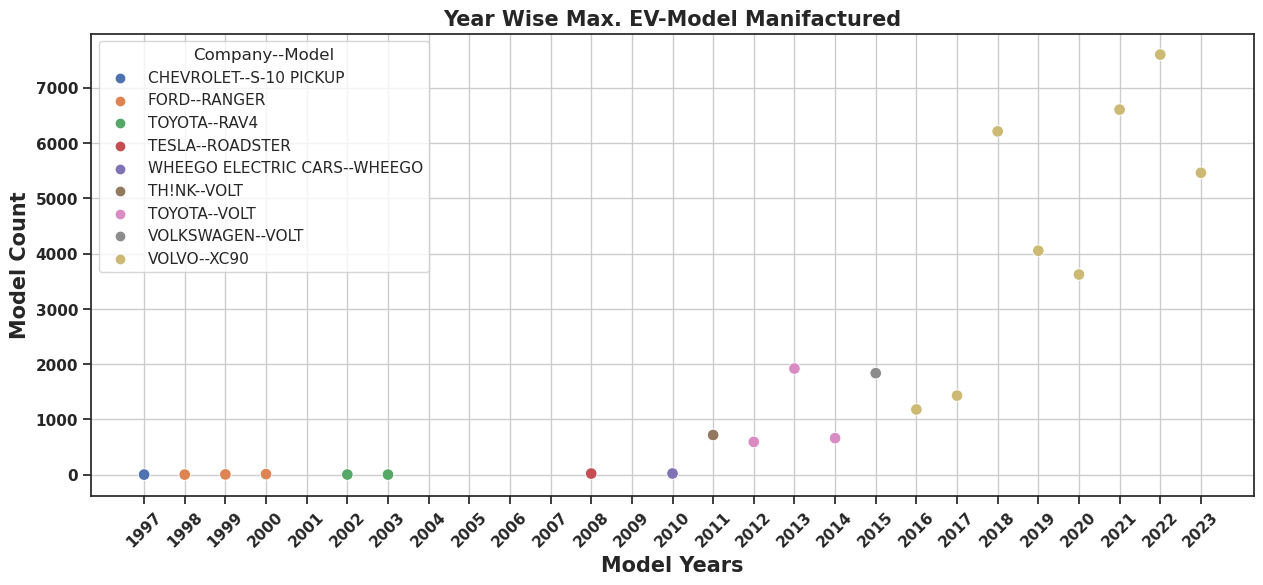

In [226]:
x=EV_DATA_YEAR_MODEL_MAX.index
y=EV_DATA_YEAR_MODEL_MAX['Model Count']
plt.figure(figsize=(15,6))
plt.title("Year Wise Max. EV-Model Manifactured",fontsize=15,weight='bold')
sns.scatterplot(x=x,y=y,hue=EV_DATA_YEAR_MODEL_MAX['Company--Model'],s=70)
plt.xticks(np.arange(1997,2024,1),rotation=45,weight="bold")
plt.xlabel("Model Years",fontsize=15,weight="bold")
plt.yticks(weight="bold")
plt.ylabel("Model Count",fontsize=15,weight="bold")
plt.grid()
plt.show()

In [16]:
EV_DATA_YEAR_MODEL_MIN['Company--Model']=EV_DATA_YEAR_MODEL_MIN['Make']+'--'+EV_DATA_YEAR_MODEL_MIN['Model']

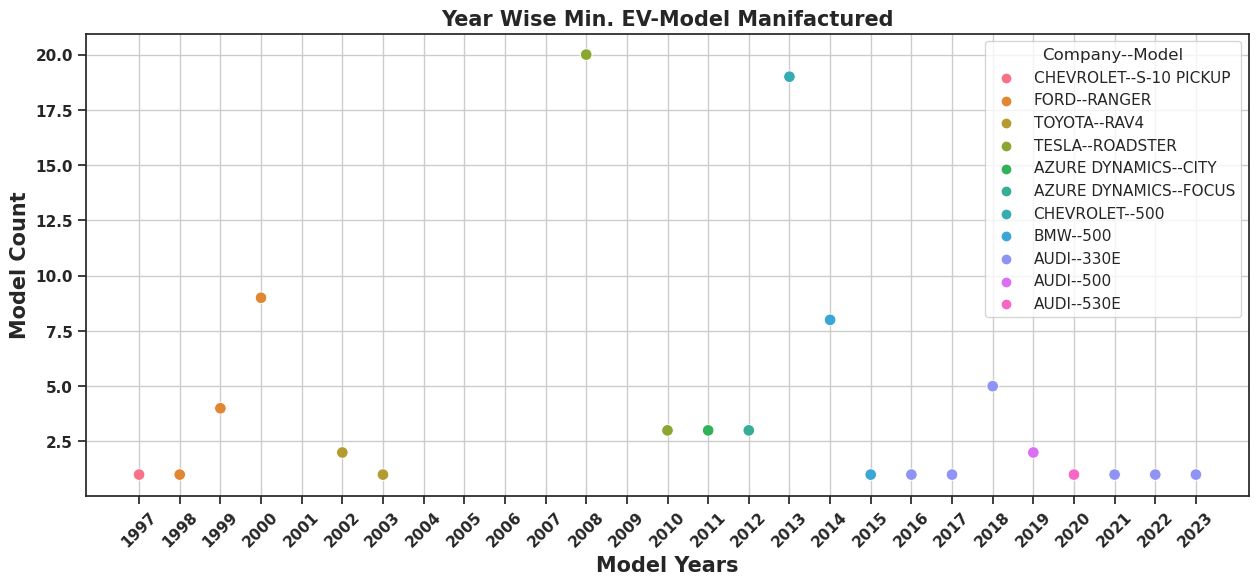

In [232]:
x=EV_DATA_YEAR_MODEL_MIN.index
y=EV_DATA_YEAR_MODEL_MIN['Model Count']
plt.figure(figsize=(15,6))
plt.title("Year Wise Min. EV-Model Manifactured",fontsize=15,weight='bold')
sns.scatterplot(x=x,y=y,hue=EV_DATA_YEAR_MODEL_MIN['Company--Model'],s=70)
plt.xticks(np.arange(1997,2024,1),rotation=45,weight="bold")
plt.xlabel("Model Years",fontsize=15,weight="bold")
plt.yticks(weight="bold")
plt.ylabel("Model Count",fontsize=15,weight="bold")
plt.grid()
plt.show()

In [18]:
EV_Data_Country_Count=pd.DataFrame(EV_Data.groupby('Country')['Make'].value_counts())

In [19]:
EV_Data_Country_Count.rename(columns={"Make":"EV Count"},inplace=True)

In [20]:
EV_Data_Country_Count.reset_index(inplace=True)

In [21]:
EV_Data_Country_Count=pd.DataFrame(EV_Data_Country_Count.groupby("Country")['EV Count'].sum())

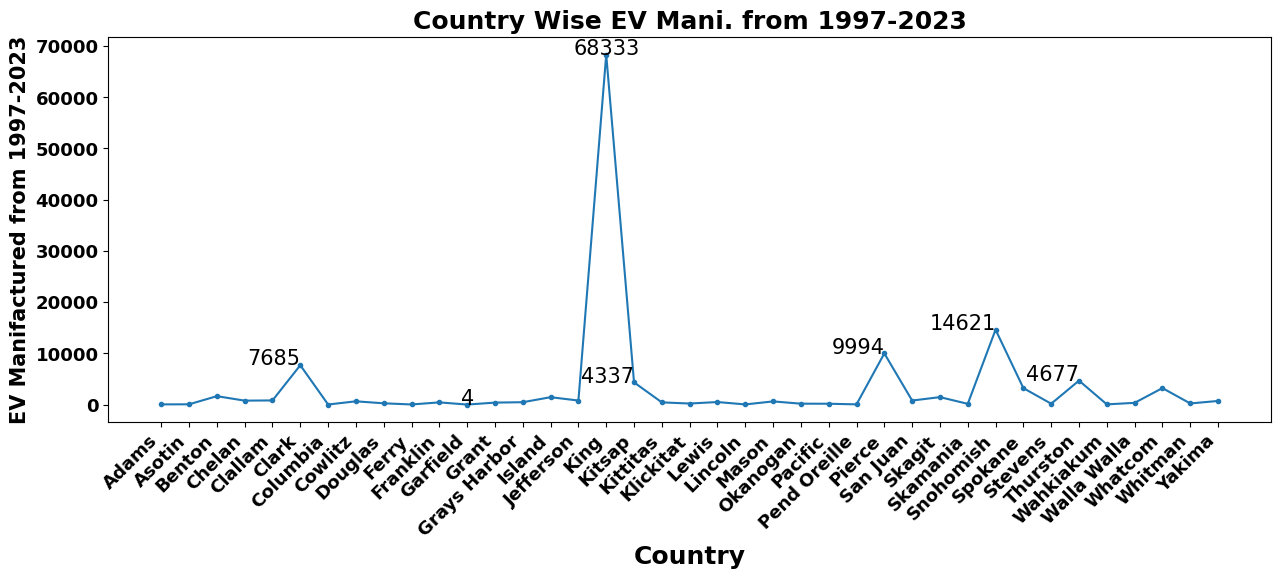

In [22]:
x=EV_Data_Country_Count.index
y=EV_Data_Country_Count['EV Count']
plt.figure(figsize=(15,5))
plt.title("Country Wise EV Mani. from 1997-2023",fontsize=18,weight='bold')
plt.plot(x,y,marker="o",markersize=3)
plt.xticks(rotation=45,ha="right",fontsize=13,weight="bold")
plt.xlabel("Country",fontsize=18,weight="bold",ha="center")
plt.yticks(fontsize=13,weight="bold")
plt.ylabel("EV Manifactured from 1997-2023",fontsize=15,weight="bold")
for i in range(len(x)):
    if y[i]==y.max():
        plt.text(i,y[i],int(y[i]),fontsize=15,weight=1,ha="center")
    elif y[i]==y.min():
        plt.text(i,y[i],int(y[i]),fontsize=15,weight=1,ha="center")
    elif y[i]>=y.mean():
        plt.text(i,y[i],int(y[i]),fontsize=15,weight=1,ha="right")
plt.show()

In [23]:
EV_Data_Country_Count1=pd.DataFrame(EV_Data.groupby('Country')['Make'].value_counts())

In [24]:
EV_Data_Country_Count1.rename(columns={"Make":"EV Count"},inplace=True)

In [59]:
EV_Data_Country_Count1.rename(columns={"Make":"Companies Name"},inplace=True)

In [25]:
EV_Data_Country_Count1.reset_index(inplace=True)

In [26]:
EV_Data_Country_Count1=pd.DataFrame(EV_Data_Country_Count1.groupby("Country")[['Make','EV Count']].max())

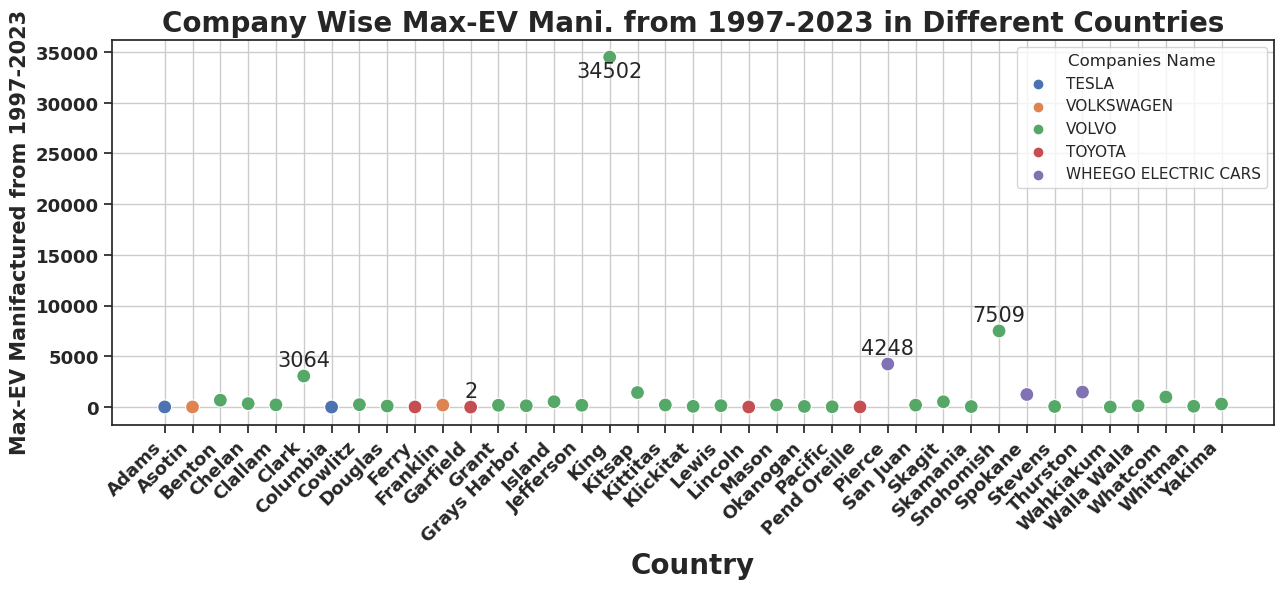

In [95]:
x=EV_Data_Country_Count1.index
y=EV_Data_Country_Count1['EV Count']
plt.figure(figsize=(15,5))
plt.title("Company Wise Max-EV Mani. from 1997-2023 in Different Countries",fontsize=20,weight='bold')
sns.scatterplot(x=x,y=y,hue=EV_Data_Country_Count1['Companies Name'],s=100)
plt.xlabel("Country",fontsize=20,weight="bold",ha="center")
plt.xticks(x,rotation=45,ha="right",fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
plt.ylabel("Max-EV Manifactured from 1997-2023",fontsize=15,weight="bold")
plt.grid()
for i in range(len(x)):
    if y[i]==y.max():
        plt.text(i,y[i]-2000,int(y[i]),fontsize=15,weight=1,ha="center")
    elif y[i]==y.min():
        plt.text(i,y[i]+1000,int(y[i]),fontsize=15,weight=1,ha="center")
    elif y[i]>=y.mean():
        plt.text(i,y[i]+1000,int(y[i]),fontsize=15,weight=1,ha="center")
plt.show()

In [28]:
EV_Data_Country_Count2=pd.DataFrame(EV_Data.groupby('Country')['Make'].value_counts())

In [29]:
EV_Data_Country_Count2.rename(columns={"Make":"EV Count"},inplace=True)

In [55]:
EV_Data_Country_Count2.rename(columns={"Make":"Companies Name"},inplace=True)

In [30]:
EV_Data_Country_Count2.reset_index(inplace=True)

In [31]:
EV_Data_Country_Count2=pd.DataFrame(EV_Data_Country_Count2.groupby("Country")[['Make','EV Count']].min())

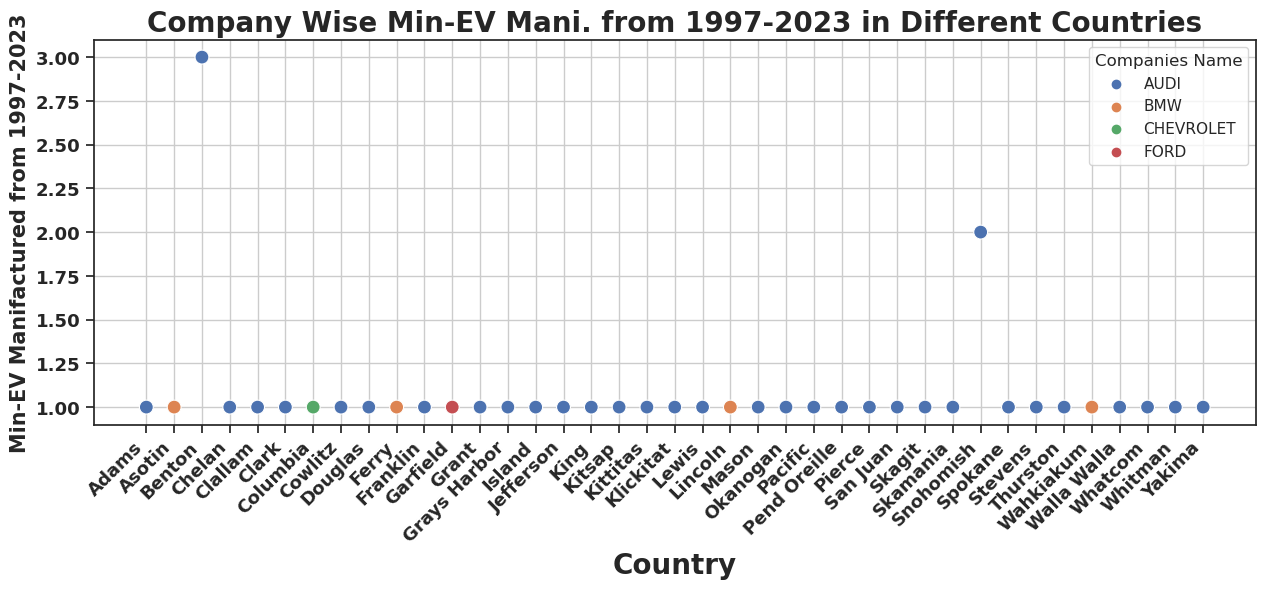

In [96]:
x=EV_Data_Country_Count2.index
y=EV_Data_Country_Count2['EV Count']
plt.figure(figsize=(15,5))
plt.title("Company Wise Min-EV Mani. from 1997-2023 in Different Countries",fontsize=20,weight='bold')
sns.scatterplot(x=x,y=y,hue=EV_Data_Country_Count2['Companies Name'],s=100)
plt.xlabel("Country",fontsize=20,weight="bold",ha="center")
plt.xticks(x,rotation=45,ha="right",fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
plt.ylabel("Min-EV Manifactured from 1997-2023",fontsize=15,weight="bold")
plt.grid()
plt.show()

In [109]:
EV_Electric_Vehicle_Type_Count=pd.DataFrame(EV_Data['Electric Vehicle Type'].value_counts())

In [123]:
EV_Electric_Vehicle_Type_Count.rename(columns={"Electric Vehicle Type":"EV Count"},inplace=True)

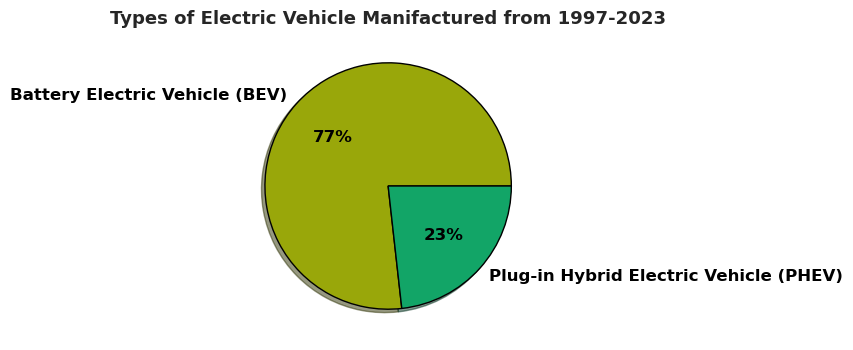

In [235]:
x=EV_Electric_Vehicle_Type_Count.index
y=EV_Electric_Vehicle_Type_Count['EV Count']
plt.figure(figsize=(7,4))
plt.title("Types of Electric Vehicle Manifactured from 1997-2023",fontsize=13,weight="bold",ha="center")
plt.pie(y,autopct="%.f%%",colors=['#99A70A',"#12A567"],labels=x,textprops={'fontsize':12,'weight':"bold",'color':'black'},wedgeprops={'edgecolor':'black'},shadow=True)
plt.show()

In [241]:
EV_Data_Make_EV_Vehicle_Type_Count=pd.DataFrame(EV_Data.groupby("Make")['Electric Vehicle Type'].value_counts())

In [244]:
EV_Data_Make_EV_Vehicle_Type_Count.rename(columns={"Electric Vehicle Type":"EV Count"},inplace=True)

In [245]:
EV_Data_Make_EV_Vehicle_Type_Count.reset_index(inplace=True)

In [247]:
EV_Data_Make_EV_Vehicle_Type_Count.set_index("Make",inplace=True)

In [250]:
EV_Data_Make_EV_Veh_BEV_Count=EV_Data_Make_EV_Vehicle_Type_Count[EV_Data_Make_EV_Vehicle_Type_Count['Electric Vehicle Type']=="Battery Electric Vehicle (BEV)"]

In [296]:
x=EV_Data_Make_EV_Veh_BEV_Count.index
y=EV_Data_Make_EV_Veh_BEV_Count['EV Count']
max_index_y=list(y).index(max(y))
min_index_y=list(y).index(min(y))
plt.figure(figsize=(10,4))
plt.bar(x,height=y,color="y",width=1)
plt.bar(x[max_index_y],y[max_index_y],color="g",width=1)
plt.bar(x[min_index_y],y[min_index_y],color="r",width=1)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Companies",fontsize=15,weight="bold")
plt.ylabel("EV Count",fontsize=15,weight="bold")
for i in range(len(x)):
    if y[i]==y.max():
        plt.text(i,y[i],int(y[i]),fontsize=12,weight=1,ha="center")
    elif y[i]==y.min():
        plt.text(i,y[i]+1000,int(y[i]),fontsize=12,weight=1,ha="center")
    elif y[i]>=y.mean():
        plt.text(i,y[i]+1000,int(y[i]),fontsize=12,weight=1,ha="center")
plt.show()

'x=EV_Data_Make_EV_Veh_BEV_Count.index\ny=EV_Data_Make_EV_Veh_BEV_Count[\'EV Count\']\nmax_index_y=list(y).index(max(y))\nmin_index_y=list(y).index(min(y))\nplt.figure(figsize=(10,4))\nplt.bar(x,height=y,color="y",width=1)\nplt.bar(x[max_index_y],y[max_index_y],color="g",width=1)\nplt.bar(x[min_index_y],y[min_index_y],color="r",width=1)\nplt.xticks(rotation=45,ha="right")\nplt.xlabel("Companies",fontsize=15,weight="bold")\nplt.ylabel("EV Count",fontsize=15,weight="bold")\nfor i in range(len(x)):\n    if y[i]==y.max():\n        plt.text(i,y[i],int(y[i]),fontsize=12,weight=1,ha="center")\n    elif y[i]==y.min():\n        plt.text(i,y[i]+1000,int(y[i]),fontsize=12,weight=1,ha="center")\n    elif y[i]>=y.mean():\n        plt.text(i,y[i]+1000,int(y[i]),fontsize=12,weight=1,ha="center")\nplt.show()'

In [255]:
EV_Data_Make_EV_Veh_PHEV_Count=EV_Data_Make_EV_Vehicle_Type_Count[EV_Data_Make_EV_Vehicle_Type_Count['Electric Vehicle Type']=="Plug-in Hybrid Electric Vehicle (PHEV)"]

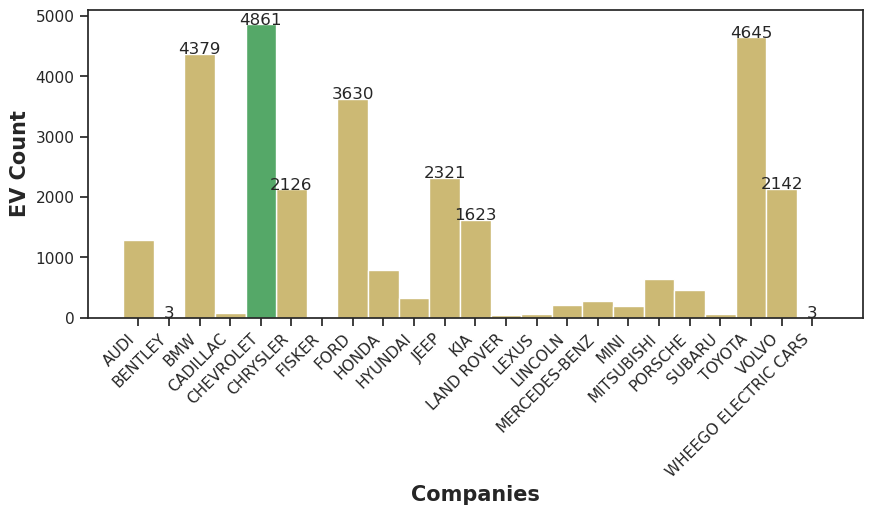

In [300]:
x=EV_Data_Make_EV_Veh_PHEV_Count.index
y=EV_Data_Make_EV_Veh_PHEV_Count['EV Count']
max_index_y=list(y).index(max(y))
min_index_y=list(y).index(min(y))
plt.figure(figsize=(10,4))
plt.bar(x,height=y,color="y",width=1)
plt.bar(x[max_index_y],y[max_index_y],color="g",width=1)
plt.bar(x[min_index_y],y[min_index_y],color="r",width=1)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Companies",fontsize=15,weight="bold")
plt.ylabel("EV Count",fontsize=15,weight="bold")
for i in range(len(x)):
    if y[i]==y.max():
        plt.text(i,y[i],int(y[i]),fontsize=12,weight=1,ha="center")
    elif y[i]==y.min():
        plt.text(i,y[i],int(y[i]),fontsize=12,weight=1,ha="center")
    elif y[i]>=y.mean():
        plt.text(i,y[i],int(y[i]),fontsize=12,weight=1,ha="center")
plt.show()